#Продвинутый Python, ДЗ-3

Правила игры:

В домашке 8 задач, разбаловка указана в задании. Суммарно за дз можно получить 100 баллов, что равняется 10 баллам

Дедлайн - 7 дней после выдачи дз. Необходимо залить решеннный ноутбук в github и прислать ссылку в Anytask (без выполнения любого из пунктов работа проверяться не будет)

В данной домашке нужно рисовать графики с помощью matplotlib или же seaborn. Обратите внимание, что все графики и оси должны быть подписаны, графики должны выглядеть аккуратно (за это будем штрафовать)

## Данные

В этом домашнем задании вам придется оказаться на месте аналитика в бразильском маркетплейсе [Olist](https://olist.com/pt-br/). Вам необходимо исследовать данные и на их основании сделать выводы, которые помогут бизнесу расцветать!

Данные находятся тут в файле archive.zip

In [ ]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=8a1347f4f780234506f1b95b38b11cb178f181c1079c4721c12b6aec066c3732
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import wget

url = 'https://github.com/Palladain/Deep_Python/raw/main/Homeworks/Homework_1/archive.zip'
filename = wget.download(url)

with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('./')

customers = pd.read_csv('olist_customers_dataset.csv')
location = pd.read_csv('olist_geolocation_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
translation = pd.read_csv('product_category_name_translation.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')

Ван дано 9 датасетов, которые содержат в себе все данные по 100 000 заказам со всей Бразилии. Чтобы облегчить вам жизнь, вот связи по этим датасетам (файл product_category_name_translation является переводом названий категорий с португальского на английский)

![](https://i.imgur.com/HRhd2Y0.png)

Ну что же, начнем!

## Задание 1 (20 баллов)

Визуализируйте зависимость между средним числом покупок товара и:

* числом фотографий товара

* кол-во символов в описании товара (аггрегируйте с шагом 20)

* кол-во символов в названии (аггрегируйте с шагом 5)

Для подсчета среднего числа покупок нужно посчитать по каждому товару число продаж, а затем взять среднее от него (учтите, что мы считаем только доставленные заказы)

In [64]:
df = orders[orders['order_status'] == 'delivered']
df = df.join(items.set_index('order_id')[['product_id']], on='order_id')
df = df.join(products.set_index('product_id')[['product_name_lenght', 'product_description_lenght', 'product_photos_qty']], on = 'product_id')
counts = df.groupby(['product_id']).agg({'order_id': 'count'}).reset_index()
counts = counts.rename(columns = {'order_id' : 'num_of_orders'})
df = df.join(counts.set_index('product_id')[['num_of_orders']], on = 'product_id')
df1 = df.groupby(['product_id', 'product_photos_qty']).agg({'num_of_orders': 'mean'}).reset_index()
df['description_interval'] = df['product_description_lenght'].apply(lambda x : (x // 20) * 20)
df2 = df.groupby(['product_id', 'description_interval']).agg({'num_of_orders': 'mean'}).reset_index()
df['name_interval'] = df['product_name_lenght'].apply(lambda x : (x // 5) * 5)
df3 = df.groupby(['product_id', 'name_interval']).agg({'num_of_orders': 'mean'}).reset_index()

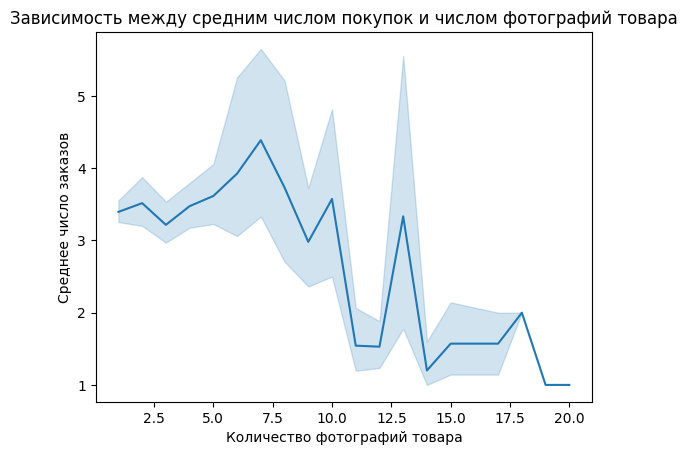

In [29]:
sns.lineplot(data=df1, y='num_of_orders', x='product_photos_qty').set(ylabel = 'Среднее число заказов', xlabel = 'Количество фотографий товара', title = '')
plt.title('Зависимость между средним числом покупок и числом фотографий товара')
plt.show()

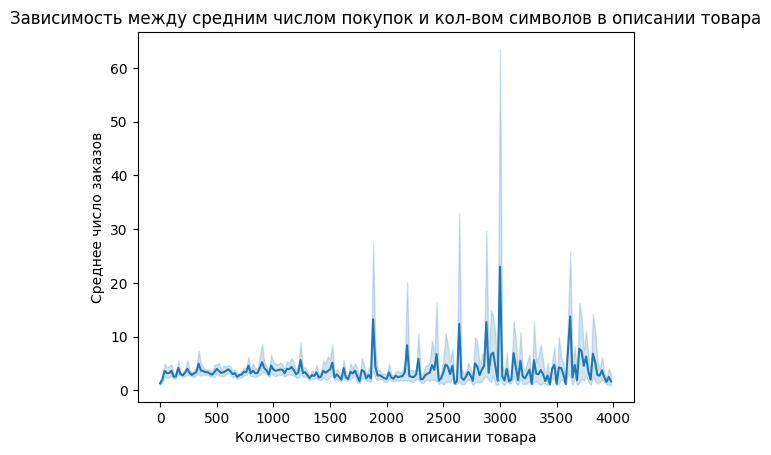

In [62]:
sns.lineplot(data=df2, y='num_of_orders', x='description_interval').set(ylabel = 'Среднее число заказов', xlabel = 'Количество cимволов в описании товара')
plt.title('Зависимость между средним числом покупок и кол-вом символов в описании товара')
plt.show()

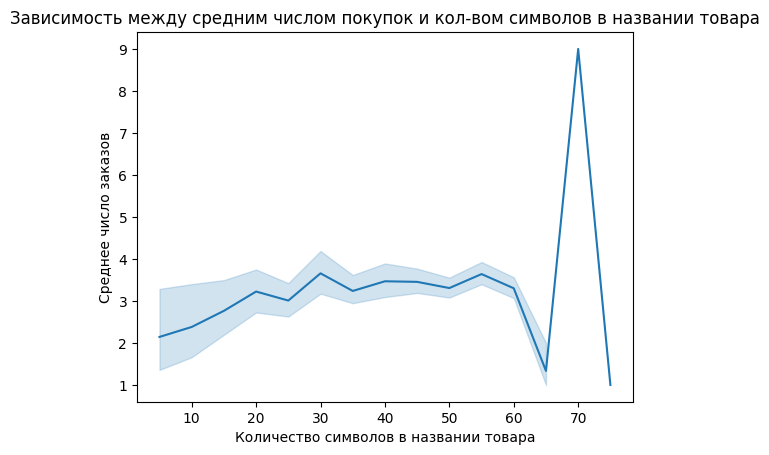

In [65]:
sns.lineplot(data=df3, y='num_of_orders', x='name_interval').set(ylabel = 'Среднее число заказов', xlabel = 'Количество cимволов в названии товара')
plt.title('Зависимость между средним числом покупок и кол-вом символов в названии товара')
plt.show()

## Задание 2 (10 баллов)

Отобразите среднюю сумму оплаты по типу оплаты (для этого вам нужна табличка payments)

In [56]:
df = payments.groupby(['payment_type']).agg({'payment_value': 'mean'}).reset_index()

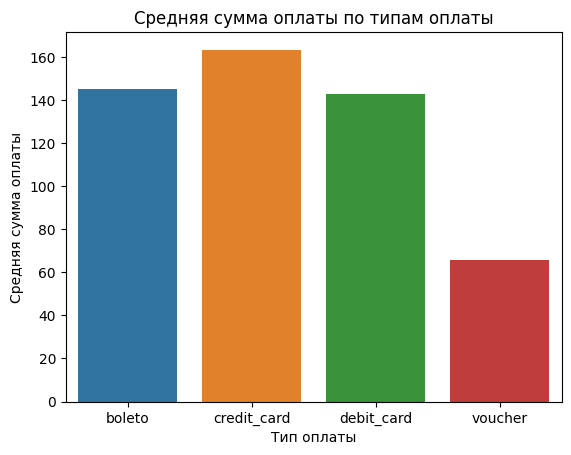

In [34]:
sns.barplot(data=df[df['payment_type'] != 'not_defined'], y='payment_value', x='payment_type').set(ylabel = 'Средняя сумма оплаты', xlabel = 'Тип оплаты')
plt.title('Средняя сумма оплаты по типам оплаты')
plt.show()

## Задание 3 (25 баллов)

Обратите внимание на число платежей (payment_installments). Выясните, какая сумма оплаты указана: за целую покупку или только за ее часть? (Обратите внимание, что в данных есть определенная бага, которую нужно расследовать и учесть)

Также покажите средний чек в зависимости от числа оплат. Есть ли какая-то связь между ними?

In [ ]:
df = payments.join(items.set_index('order_id')[['price', 'freight_value']], on='order_id')
df['is_payment_full'] = df['price'] + df['freight_value'] == df['payment_value']
df['is_payment_full'].value_counts()

True     69631
False    48800
Name: is_payment_full, dtype: int64

**Видим, что значений False в колонке is_payment_full достаточно много, следовательно, сумма оплаты указана только за часть покупки :(**

In [35]:
df = payments.join(items.set_index('order_id')[['price', 'freight_value']], on='order_id')
df['invoice'] = df['price'] + df['freight_value']
df = df.groupby(['payment_installments', 'order_id']).agg({'invoice': 'mean'}).reset_index()

Text(0.5, 1.0, 'Средний чек в зависимости от числа оплат')

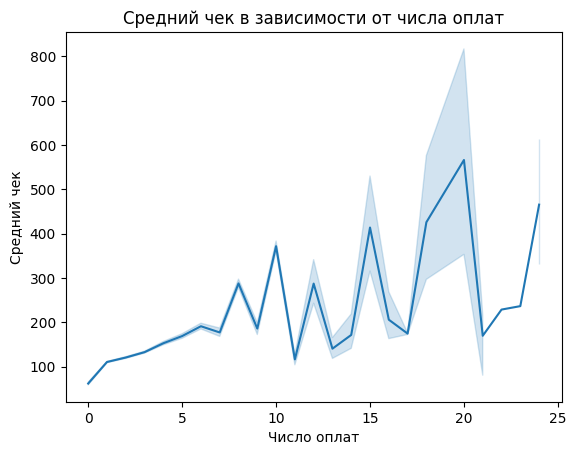

In [36]:
sns.lineplot(data=df, y='invoice', x='payment_installments').set(ylabel = 'Средний чек', xlabel = 'Число оплат')
plt.title('Средний чек в зависимости от числа оплат')

## Задание 4 (15 баллов)

Визуализируйте зависимость между ценой заказа и ценой доставки по штатам покупки. Есть ли какая-нибудь зависимость и как вы можете ее обосновать?

In [45]:
df = orders[orders['order_status'] == 'delivered']
df = df.join(customers.set_index('customer_id')[['customer_state']], on = 'customer_id')
df = df.join(items.set_index('order_id')[['price', 'freight_value']], on = 'order_id')

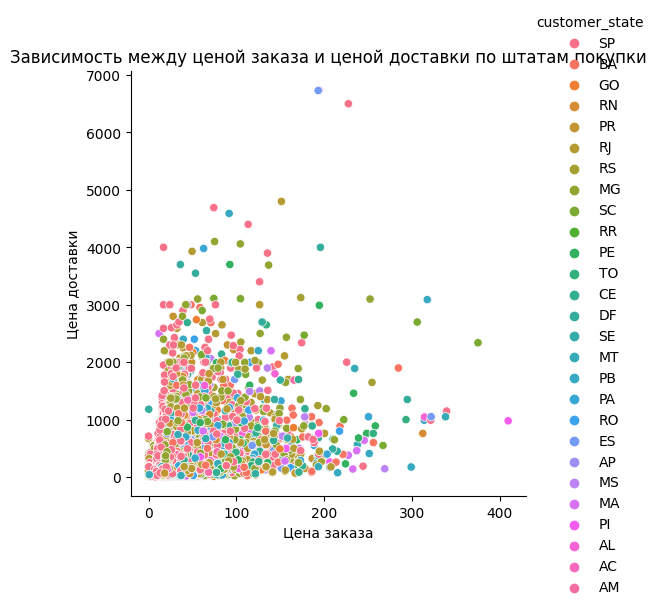

In [53]:
sns.relplot(data=df, x='freight_value', y='price', hue='customer_state')
plt.xlabel('Цена заказа')
plt.ylabel('Цена доставки')
plt.title('Зависимость между ценой заказа и ценой доставки по штатам покупки')
plt.show()

**По возрастающему тренду делаем вывод, что чем выше цена заказа, тем выше цена доставки. Это вполне логично, потому что более дорогие заказы, как правило, содержат больше товаров, что влияет на стоимость доставки**

## Задание 5 (15 баллов)

Отобразите распределение оценок для заказов, которые были доставлены вовремя и которые пришли с опозданием. Насколько влияет факт опоздания на оценку? (оценки берутся из таблицы reviews)

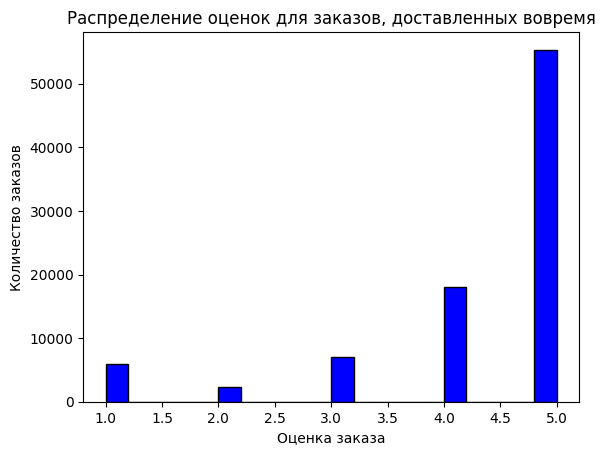

In [ ]:
df = reviews.join(orders.set_index('order_id')[['order_estimated_delivery_date', 'order_delivered_customer_date']], on = 'order_id')
df_ok = df[df['order_estimated_delivery_date'] > df['order_delivered_customer_date']]
plt.hist(df_ok['review_score'], color = 'blue', edgecolor = 'black', bins = 20)
plt.xlabel('Оценка заказа')
plt.ylabel('Количество заказов')
plt.title('Распределение оценок для заказов, доставленных вовремя')
plt.show()

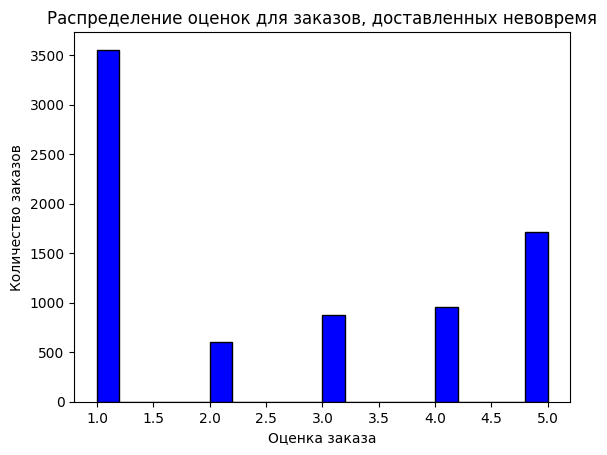

In [ ]:
df_not_ok = df[df['order_estimated_delivery_date'] <= df['order_delivered_customer_date']]
plt.hist(df_not_ok['review_score'], color = 'blue', edgecolor = 'black', bins = 20)
plt.xlabel('Оценка заказа')
plt.ylabel('Количество заказов')
plt.title('Распределение оценок для заказов, доставленных невовремя')
plt.show()

**Из графиков видим, что оценки за заказы, доставленные вовремя как правило выше оценок за заказы, доставленные с опозданием - среди поздно доставленных заказов доля низких оценок значительно выше, из чего делаем вывод, что опоздание влияет на оценку**

## Задание 6 (15 баллов)

Изобразите зависимость между ценой заказа и числом дней между покупкой и доставкой с разбивкой по признаку "есть заказ из другого штата". Есть ли зависимость?

In [54]:
df = items.join(sellers.set_index('seller_id')[['seller_state']], on = 'seller_id')
df = df.join(orders.set_index('order_id'), on = 'order_id')
df = df.join(customers.set_index('customer_id')[['customer_state']], on = 'customer_id')
df['is_the_same'] = df['seller_state'] == df['customer_state']
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'], format="%Y-%m-%d %H:%M:%S")
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], format="%Y-%m-%d %H:%M:%S")
df['days'] = df['order_delivered_customer_date'] - df['order_purchase_timestamp']
df['days'] = df['days'].apply(lambda x : x.days)

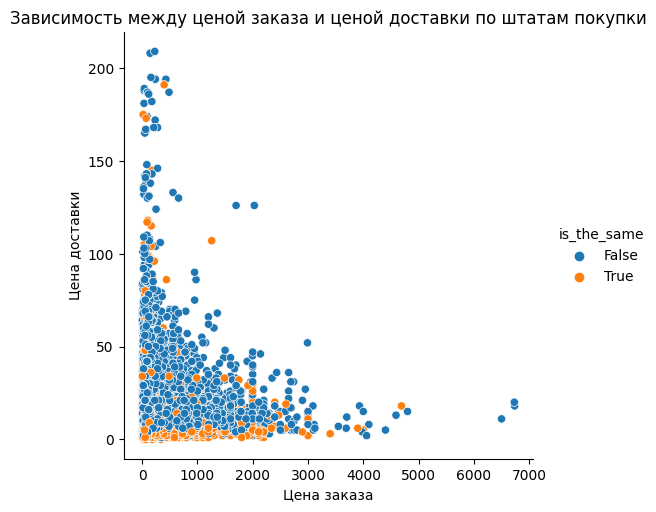

In [55]:
sns.relplot(data=df, x='price', y='days', hue='is_the_same')
plt.xlabel('Цена заказа')
plt.ylabel('Цена доставки')
plt.title('Зависимость между ценой заказа и ценой доставки по штатам покупки')
plt.show()

**Зависимости не наблюдается**